# Problema
En este problema tenemos los datos de una empresa en donde se muestran las ventas obtenidas en base a la publicidad hecha en distintos medios. El objetivo es desarrollar un algoritmo que nos sirva para encontrar cuales son los mejores para hacer publicidad que nos lleve a tener buenas ventas.

In [1]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}datasets{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'C:\\Users\\owent\\OneDrive\\Escritorio\\Data Science\\ML_Proyects\\Untitled Folder\\datasets\\'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# DataSet1 que corresponde a las descripciones de los puestos
filename = DIR_DATA + 'Advertising.csv'

In [4]:
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df = df.iloc[:,1:] # eliminamos 1ra columna que no aporta nada
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Como nuestro objetivo es encontrar la mejor forma de publicitar un producto (y que nos genere mas ventas) la columna "Sales" sera nuestra variable dependiente

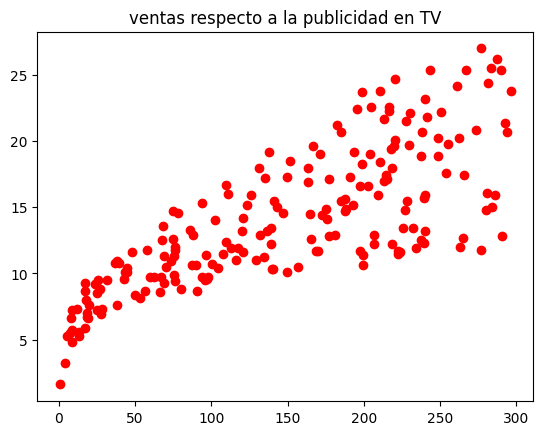

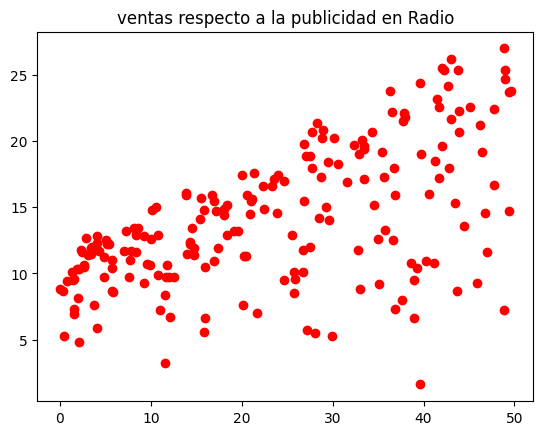

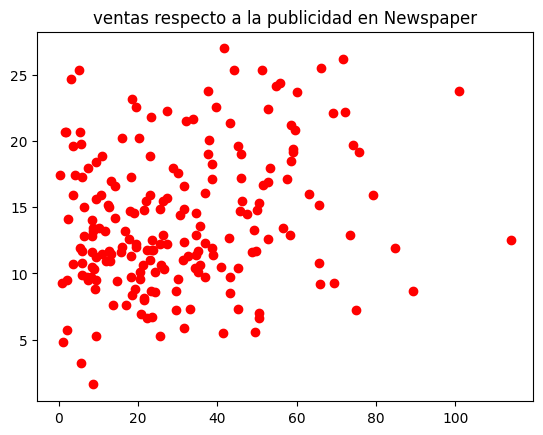

In [10]:
cols = ['TV', 'Radio', 'Newspaper']
for col in cols:
    plt.plot(df[col], df['Sales'],'ro') 
    plt.title('ventas respecto a la publicidad en %s' % col)
    plt.show()

# Regresion Lineal Simple

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df['TV'].values.reshape(-1,1) # los convertimos a matriz
y = df['Sales'].values

Utilizamos .values.reshape(-1,1) porque scikit-learn espera que las características de entrada para el modelo de regresión sean una matriz bidimensional, donde cada fila representa una observación y cada columna representa una característica.

In [ ]:
# Dividimos conjunto de datos entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Entrenamos el modelo lineal con los datos
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

In [ ]:
#Prediccion de los valores usando el modelo
predict = lin_reg.predict(X_test)

In [ ]:
print(f'Predicciones: {predict[:4]}, Reales: {y_test[:4]}')

In [ ]:
#RMSE
rmse = mean_squared_error(y_test,predict, squared=False)
print('RMSE: ',rmse)

#R^2
print('R^2: ',r2_score(y_test,predict))

**RMSE** nos indica cuánto varían en promedio las predicciones del modelo con respecto a los valores reales.

El parámetro squared = False indica que la función debería devolver la raíz cuadrada del error cuadrático medio en lugar del propio error cuadrático medio. Esto es específico para el cálculo del RMSE en lugar del MSE. Si se omite o se establece en True (que es el valor por defecto), devolverá el MSE.

**R^2** indica qué tan bien los valores observados se ajustan a los valores predichos por el modelo de regresión. Cuanto más cercano sea el valor de R^2 a 1, mejor será el ajuste del modelo a los datos observados.

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de los datos reales
plt.scatter(X_test, y_test, color='red', label='Datos reales')

# Gráfico de la línea de regresión
plt.plot(X_test, predict, color='blue', linewidth=2, label='Línea de regresión')

plt.title('Ventas respecto a la publicidad en TV')
plt.xlabel('Publicidad en TV')
plt.ylabel('Ventas')
plt.legend()
plt.show()


In [ ]:
def modelos_simple(independiente):
    X = df[independiente].values.reshape(-1,1)
    y = df['Sales'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    predict = lin_reg.predict(X_test)
    rmse = mean_squared_error(y_test,predict, squared=False)
    print('RMSE: ',rmse)
    print('R^2: ',r2_score(y_test,predict))
    plt.plot(X_test, y_test, 'ro')
    plt.plot(X_test, predict)
    plt.show()

### ventas respecto a la publicidad en Radio

In [ ]:
modelos_simple('Radio')

### ventas respecto a la publicidad en periodico

In [ ]:
modelos_simple('Newspaper')

Los resultados obtenidos por cada uno de los modelos son los siguientes:

    TV: R^2: 0.6766954295627076 RMSE: 3.194472431998898
    Radio: R^2: 0.2634309396999791 RMSE: 4.8216974799471926
    Periodico: R^2: 0.029871749149522397 RMSE: 5.533600454969853
    
Con base a los resultados podemos decir que el mejor modelo cuando utilizamos una sola variable independiente es el de TV, seguido por el de Radio y el que peor rendimiento muestra es el de Periódico.

Conociendo los resultados de los modelos podemos ahora a la creación del modelo de regresión lineal múltiple haciendo distintas combinaciones de las variables del conjunto, con esta combinación de variables veremos si podemos conseguir un modelo que tenga un mejor rendimiento con los datos que se tienen.

# Regresion lineal Multiple

In [ ]:
import seaborn as sns

In [ ]:
X = df.drop(['Radio', 'Sales'], axis =1 ).values #TV y  Periodico
y = df['Sales'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

predict = lin_reg.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(predict[:4], y_test[:4]))

rmse = mean_squared_error(y_test,predict, squared=False)
print('RMSE: ',rmse)
print('R2: ',r2_score(y_test,predict))

sns.regplot(x=y_test, y =predict)




In [ ]:
X = df.drop(['Newspaper', 'Sales'], axis =1 ).values #TV y  Radio
y = df['Sales'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

predict = lin_reg.predict(X_test)
print('Predicciones: {}, Reales: {}'.format(predict[:4], y_test[:4]))

rmse = mean_squared_error(y_test,predict, squared=False)
print('RMSE: ',rmse)
print('R^2: ',r2_score(y_test,predict))

sns.regplot(x=y_test, y =predict)



Los resultados obtenidos por cada uno de los modelos son los siguientes: 

    TV - Newspaper: R^2: 0.649515280538585 RMSE: 3.3260422878644853
    TV - Radio: R^2: 0.9005833101920356 RMSE: 1.7714254173033515

Con base a los resultados podemos decir que el mejor modelo cuando utilizamos TV - Radio.